# Upward and Downward Continuation

### **This notebook ilustrate how to get an upward continuated data and it shows the differences between calculated the filtered data using Simple Fourier Domain and the function from Fatiando.**

** The simple gravity data in Fourier Domain can be expressed by using the Fourier Transform as follow:**

# $$\mathcal{F}\left[G(x,y)\right] = \int G(x,y)\, e^{-i(K_{x}x \, + \, K_ {y}y)}\, dx\,dy$$

**where $G(x)$ is the simple gravity data in the space domain.**

** The continuation filter expression is given by:**
# $$ \mathcal{K}(u,v) = e^{-h \,(k_{x}^2 + k_{y}^2)^{\frac{1}{2}}}$$

**where $h = d - z$ is the difference between the new level of observation $d$ and the original observation height $z$; $k_x$ and $k_y$ are the wavenumber in $X$ and $Y$ directions; and $\mathcal{K}$ is the filter which will be applied on the gravity data.**

**The exponential can be positive or negative:**
* $d > z \rightarrow\, h > 0$ - upward continuation;
* $d < z \rightarrow\, h < 0$ - downward continuation.


**The continuated data is obtained by multiplying the filter $\mathcal{K}$ and the gravity transformed data $G(k)$. After that, it should be applied the inverse Fourier transform on the continuated data for return on the gravity data in space domain.**

In [1]:
# Copying all usefull libraries
import numpy
from matplotlib import pyplot
import sys

In [2]:
sys.path.append('codes/') 

In [3]:
from codes import sphere, statistical, filtering, auxiliars, grids

### Synthetic Gravity Data

In [4]:
# Definition for number of points and grid creation
shape = (100, 100)
x, y, z = grids.regular_grid((-2000., 2000., -2000., 2000.), shape, -50.)

dz = 100.

In [5]:
#Informations about the spheres
sphere1 = [-1000., 500., 200., 450.]
sphere2 = [800., -500., 1000., 1500.]
rho1 = -2100.
rho2 = 2673.

In [6]:
# Calculate the gravity attraction
gz1 = sphere.sphere_gz(x, y, z, sphere1, rho1)
gz2 = sphere.sphere_gz(x, y, z, sphere2, rho2)
gz = gz1 + gz2

In [7]:
# Calculating the true gravity at level dz
gz_true = sphere.sphere_gz(x, y, z - dz, sphere1, rho1) + sphere.sphere_gz(x, y, z - dz, sphere2, rho2)

In [8]:
# Showing values
_ = statistical.analysis(gz, 'mGal')

Minimum:    -63.7217 mGal
Maximum:    228.5146 mGal
Mean value: 50.3459 mGal
Variation:  292.2363 mGal


In [9]:
# Adding noise
data = auxiliars.noise_normal_dist(gz, 2., 0.1)

In [10]:
# Importing the continuation function
from codes.filtering import continuation

In [11]:
# Calculating the upward continuated data
gz_up = continuation(x.reshape(shape), y.reshape(shape), data.reshape(shape), 50.)

In [12]:
# Calulate the differentes 
res = gz_true.reshape(shape) - gz_up

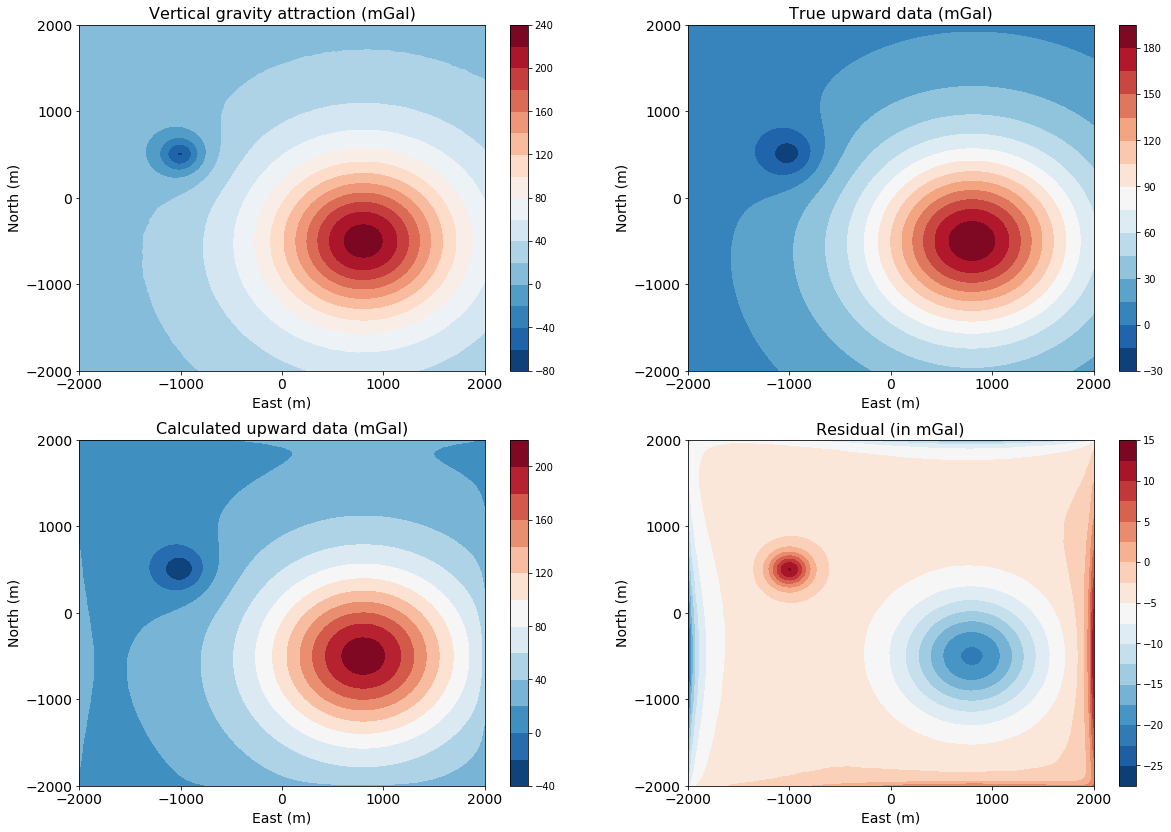

In [13]:
# Plotting the gravity data
pyplot.figure(figsize=(20,14))

pyplot.subplot(2,2,1)
pyplot.title('Vertical gravity attraction (mGal)', fontsize = 16)
pyplot.contourf(x.reshape(shape), y.reshape(shape), data.reshape(shape), 15, cmap = pyplot.cm.RdBu_r)
pyplot.xlabel('East (m)', fontsize = 14)
pyplot.ylabel('North (m)', fontsize = 14)
pyplot.xticks(numpy.arange(x.min(), x.max() + 1, 1000), fontsize = 14)
pyplot.yticks(numpy.arange(y.min(), y.max() + 1, 1000), fontsize = 14)
pyplot.colorbar()

pyplot.subplot(2,2,2)
pyplot.title('True upward data (mGal)', fontsize = 16)
pyplot.contourf(x.reshape(shape), y.reshape(shape), gz_true.reshape(shape), 15, cmap = pyplot.cm.RdBu_r)
pyplot.xlabel('East (m)', fontsize = 14)
pyplot.ylabel('North (m)', fontsize = 14)
pyplot.xticks(numpy.arange(x.min(), x.max() + 1, 1000), fontsize = 14)
pyplot.yticks(numpy.arange(y.min(), y.max() + 1, 1000), fontsize = 14)
pyplot.colorbar()

pyplot.subplot(2,2,3)
pyplot.title('Calculated upward data (mGal)', fontsize = 16)
pyplot.contourf(x.reshape(shape), y.reshape(shape), gz_up.reshape(shape), 15, cmap = pyplot.cm.RdBu_r)
pyplot.xlabel('East (m)', fontsize = 14)
pyplot.ylabel('North (m)', fontsize = 14)
pyplot.xticks(numpy.arange(x.min(), x.max() + 1, 1000), fontsize = 14)
pyplot.yticks(numpy.arange(y.min(), y.max() + 1, 1000), fontsize = 14)
pyplot.colorbar()

pyplot.subplot(2,2,4)
pyplot.title('Residual (in mGal)', fontsize = 16)
pyplot.contourf(x.reshape(shape), y.reshape(shape), res, 15, cmap = pyplot.cm.RdBu_r)
pyplot.xlabel('East (m)', fontsize = 14)
pyplot.ylabel('North (m)', fontsize = 14)
pyplot.xticks(numpy.arange(x.min(), x.max() + 1, 1000), fontsize = 14)
pyplot.yticks(numpy.arange(y.min(), y.max() + 1, 1000), fontsize = 14)
pyplot.colorbar()

#pyplot.savefig('figures/upward-cont.png', facecolor='w', edgecolor='w', bbox_inches='tight')
pyplot.show()